https://towardsdatascience.com/apple-stock-and-bitcoin-price-predictions-using-fbs-prophet-for-beginners-python-96d5ec404b77

### Import Dependencies

In [1]:
#environment: streamlit

In [1]:
import warnings; 
warnings.simplefilter('ignore')

import pandas as pd
from fbprophet import Prophet
import numpy as np

### Read df

In [2]:
df = pd.read_pickle('btcusdt_1d_ohlcv_av_1Jan2019_to_24Sep2021_1day.pkl')

In [3]:
df.head(1)

,open_time,BTCUSDT_open,BTCUSDT_high,BTCUSDT_low,BTCUSDT_close,BTCUSDT_volume,close_time,qav,num_trades,taker_base_vol,...,nfp_close,btc_txn_vol,btc_wallet_unique,btc_blk_size_mb,year,month,date_of_month,day_of_week,day_of_year,hour_of_day
0,2019-01-01,3701.23,3810.16,3642.0,3797.14,23741.687033,2019-01-01 23:59:59.999000064,8.814925e+07,154227,12919.155899,...,147879.0,NaN,31920413.0,0.801779,2019,1,1,1,1,59


In [4]:
df = df[['date','BTCUSDT_close']]

In [5]:
#rename columns to a readable format for fbprophet
df.rename(columns={"date": "ds", "BTCUSDT_close": "y"}, inplace=True)

### Train model

In [7]:
#uncertainty level of 95% picked, default is 80%
m = Prophet(interval_width=0.8, daily_seasonality=False)
model = m.fit(df)

Initial log joint probability = -21.402
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2537.51     0.0292718       488.478           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2587.75    0.00176353       925.839     0.06174           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2620.46    0.00873732       414.779           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     364       2643.86   0.000505666       261.525    2.11e-06       0.001      462  LS failed, Hessian reset 
     399       2646.53   0.000453505       51.1805      0.3448           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     450       2651.95   0.000215645     

### Forecast next 28 days (1month)

In [8]:
future = m.make_future_dataframe(periods=28,freq='D')
forecast = m.predict(future)
forecast.head()

10  LS failed, Hessian reset 
     499       2655.78   0.000427861       130.154      0.8471      0.8471      667   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2661.86   0.000901702       141.892           1           1      789   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       2664.73    0.00209214       79.7824           1           1      916   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     722       2665.47   0.000914612        151.52   6.703e-06       0.001      988  LS failed, Hessian reset 
     799       2666.68   2.50538e-07       67.8831      0.4508      0.4508     1079   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     802       2666.68   1.21841e-07       64.8621      0.2453           1     1083   
Optimization terminated normally: 
  Convergence detecte

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,-320.571136,-2728.224363,5194.996868,-320.571136,-320.571136,1508.775953,1508.775953,1508.775953,-56.818794,-56.818794,-56.818794,1565.594747,1565.594747,1565.594747,0.0,0.0,0.0,1188.204817
1,2019-01-02,-303.196100,-2437.510898,5821.901815,-303.196100,-303.196100,1977.538826,1977.538826,1977.538826,71.843861,71.843861,71.843861,1905.694966,1905.694966,1905.694966,0.0,0.0,0.0,1674.342727
2,2019-01-03,-285.821063,-2486.197073,5574.220874,-285.821063,-285.821063,2123.499878,2123.499878,2123.499878,-94.764611,-94.764611,-94.764611,2218.264489,2218.264489,2218.264489,0.0,0.0,0.0,1837.678814
3,2019-01-04,-268.446027,-1591.176930,6417.344290,-268.446027,-268.446027,2581.189770,2581.189770,2581.189770,82.612368,82.612368,82.612368,2498.577402,2498.577402,2498.577402,0.0,0.0,0.0,2312.743743
4,2019-01-05,-251.070991,-1358.207149,6299.996951,-251.070991,-251.070991,2732.429455,2732.429455,2732.429455,-10.121188,-10.121188,-10.121188,2742.550643,2742.550643,2742.550643,0.0,0.0,0.0,2481.358464


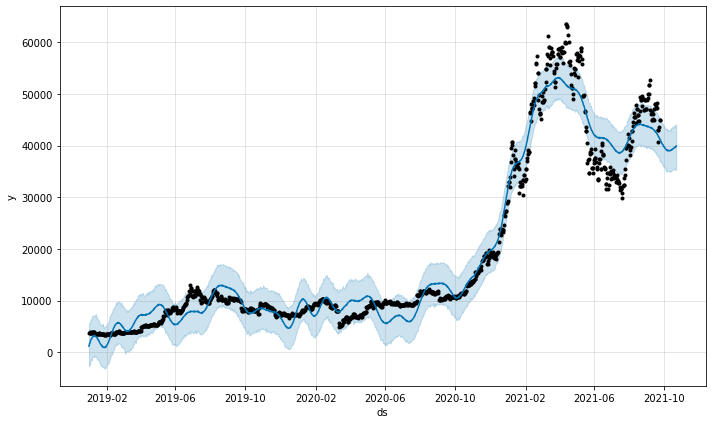

In [9]:
plot1 = m.plot(forecast)

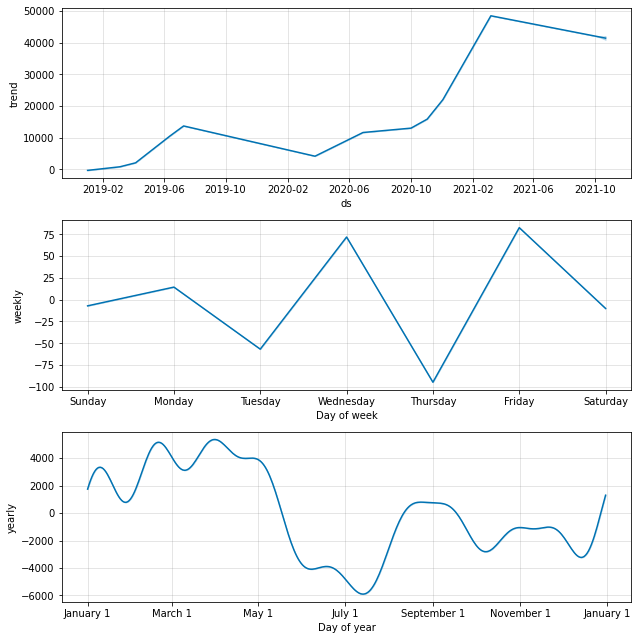

In [10]:
plt2 = m.plot_components(forecast)

In [11]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [12]:
### RMSE is very high, this model is not a good predictor
print(rmse)

12922.930741906941


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1190 non-null   datetime64[ns]
 1   y       1190 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.2 KB


In [18]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '28 days')


INFO:prophet:Making 4 forecasts with cutoffs between 2020-03-05 00:00:00 and 2021-08-27 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -9.74572
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       1499.76    0.00047976       88.2073   3.522e-06       0.001      144  LS failed, Hessian reset 
      99       1500.27   0.000446651       73.3727           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       1501.22   0.000476417        94.224   6.017e-06       0.001      242  LS failed, Hessian reset 
     199       1502.55    0.00150366       160.791      0.7085      0.7085      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1505.32   0.000171913       43.8007           1           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       1505.78   0.000157077       137.196   8.281e-07       0.001      524  LS failed, Hessian rese

In [20]:
cutoffs = pd.to_datetime(['2021-01-30', '2021-03-30', '2021-06-30'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='28 days')

  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -34.6941
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2628.81    0.00979898        304.98           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2656.45    0.00467307       109.561      0.6701      0.6701      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       2661.25   0.000933219       400.194   4.228e-06       0.001      329  LS failed, Hessian reset 
     299       2665.04    0.00348919       417.604      0.1923      0.9864      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2678.1    0.00800213       815.155        4.74       0.474      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       2680.04   8.70092e-05    

In [21]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2.267487e+07,4761.813363,2937.145504,0.100470,0.156122,0.102819,0.519231
1,5 days,2.590741e+07,5089.932055,3091.759320,0.106952,0.156122,0.109525,0.500000
2,6 days,3.070403e+07,5541.121527,3273.231101,0.109786,0.034197,0.113348,0.500000
3,7 days,3.870465e+07,6221.305880,3878.481912,0.174336,0.039961,0.157832,0.423077
4,8 days,4.497031e+07,6705.990398,4443.757523,0.219880,0.175759,0.192604,0.346154
